# 2.2장

# Colab에서 실행하기

<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2025/blob/main/Basic_day2/2_2_SVD_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Eigenvalues and eigenvectors

In [1]:
import numpy as np
from scipy.linalg import eig,hankel
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
L, V = np.linalg.eig(A)
L = np.diag(L)
print(L)
print(V)

[[ 7.9579162   0.          0.        ]
 [ 0.         -1.25766471  0.        ]
 [ 0.          0.          0.2997485 ]]
[[-0.5297175  -0.90730751  0.28380519]
 [-0.44941741  0.28662547 -0.39012063]
 [-0.71932146  0.30763439  0.87593408]]


In [3]:
print(np.sum(abs(V**2), axis=0))  # eigenvectors are unitary

[1. 1. 1.]


In [6]:
print(np.allclose(A@V[:,0], L[0,0]*V[:,0]))  # check the computation

True


# 2. SVD

### Import Libraries

In [7]:
import scipy
from scipy import linalg
import numpy as np

In [8]:
A = np.array([[3, 1, 1], [-1, 3, 1]])
A

array([[ 3,  1,  1],
       [-1,  3,  1]])

In [9]:
U, s, V = linalg.svd(A, full_matrices=True)

In [10]:
U = np.asmatrix(U)
U

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [17]:
s = np.asmatrix(s)
s

matrix([[3.46410162, 3.16227766]])

In [12]:
V = np.asmatrix(V)
V

matrix([[-4.08248290e-01, -8.16496581e-01, -4.08248290e-01],
        [-8.94427191e-01,  4.47213595e-01,  5.26260748e-16],
        [-1.82574186e-01, -3.65148372e-01,  9.12870929e-01]])

In [14]:
A.shape

(2, 3)

In [15]:
np.min(A.shape)

np.int64(2)

In [18]:
S = np.zeros_like(A, dtype=float)
for i in range(np.min(A.shape)) :
    S[i, i] = s[0,i]
S

array([[3.46410162, 0.        , 0.        ],
       [0.        , 3.16227766, 0.        ]])

In [21]:
print(np.allclose(U * S * V, A))

True


## Image Compression with SVD

In [24]:
import numpy as np
from scipy import linalg
from skimage import data
import matplotlib.pyplot as plt

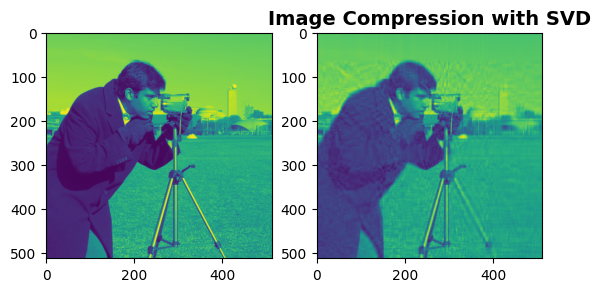

In [25]:
# `skimage`로부터 이미지 가져오기
img= data.camera()

# Singular Value Decomposition
U, sigma, V_T = linalg.svd(img)
# 32개의 특이값만을 사용(새로운 데이터 이름은 ‘A’로 한다)
A = np.dot(U[:,0:32], np.dot(np.diag(sigma[0:32]), V_T[0:32,:]))
plt.figure(1)
# 원래의 ‘img’를 표시(첫 번째 subplot)
plt.subplot(1, 2, 1)
plt.imshow(img)
# ‘A’를 표시(두 번째 subplot)
plt.subplot(1, 2, 2)
plt.imshow(A)
plt.title('Image Compression with SVD', fontsize=14, fontweight='bold')
plt.show()

# 3. PCA(Principal Component Analysis)

In [ ]:
#Import the wine data set
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/SLCFLAB/Fintech2025/main/Basic_day2/data/wine.data'
df_wine = pd.read_csv(wine_url, header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
# Split the data into 70% training and 30% test subsets
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=0) #7:3으로 분할

In [30]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) #training set의 parameter를 사용하여 test set의 데이터도 변환.

In [32]:
# Calculate the covariance matrix and eigenvalues
import numpy as np
cov_mat = np.cov(X_train_std.T) #공분산 행렬 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #np.linalg.eigh도 활용해보는 것을 추천한다.
print(f'Eigenvalues\n{eigen_vals}')

Eigenvalues
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


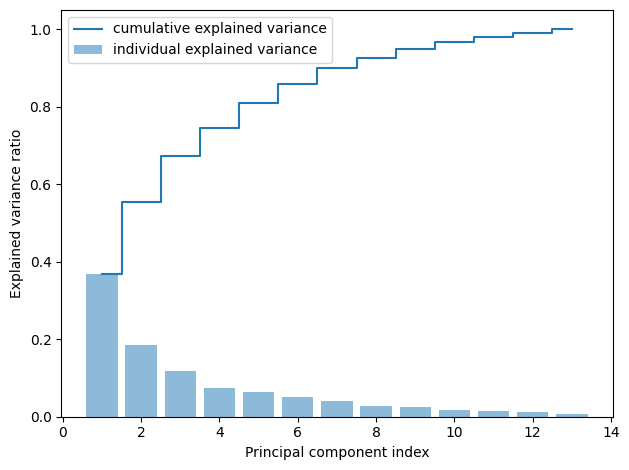

In [33]:
# Calculate and plot the explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] #크기 순으로 정렬
cum_var_exp = np.cumsum(var_exp) #누적 합산

import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [34]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

# PCA of 2 variables
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


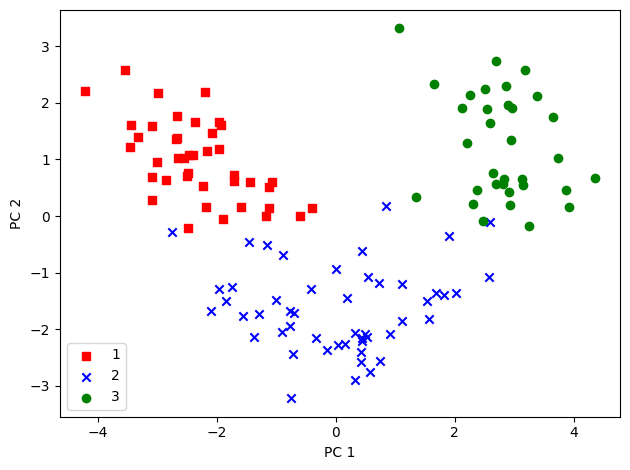

In [36]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Principal component analysis in scikit-learn

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std) #정규화된 데이터를 사용
# X_test_pca = pca.fit(X_train_std).transform(X_test_pca)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

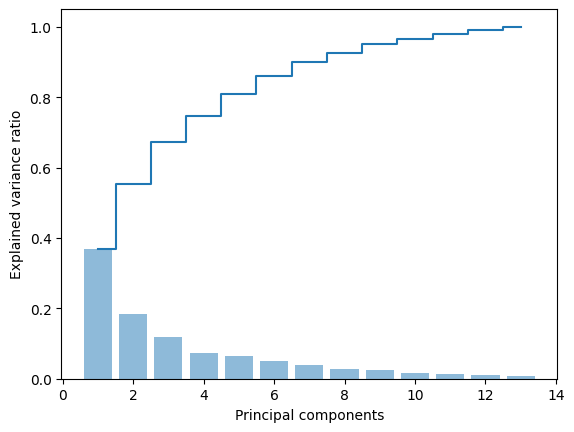

In [39]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [40]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

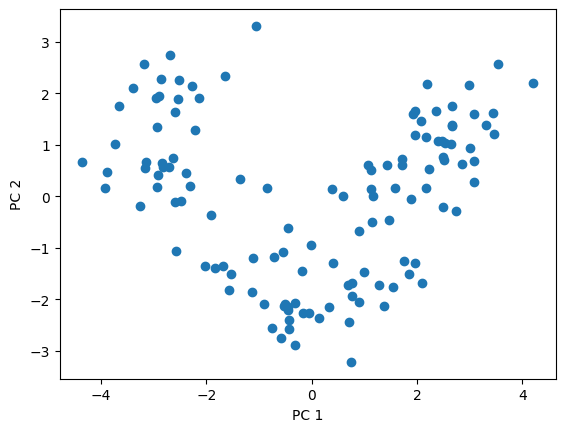

In [41]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Logistic Regression Classifier with PCA

In [42]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #x의 범위를 통해 plot의 범위 설정
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [43]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

C:\Users\YJPark\AppData\Local\Temp\ipykernel_24852\3174382682.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


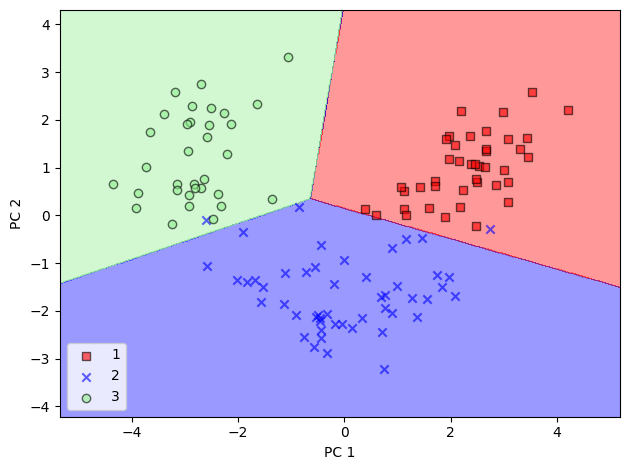

In [44]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

C:\Users\YJPark\AppData\Local\Temp\ipykernel_24852\3174382682.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


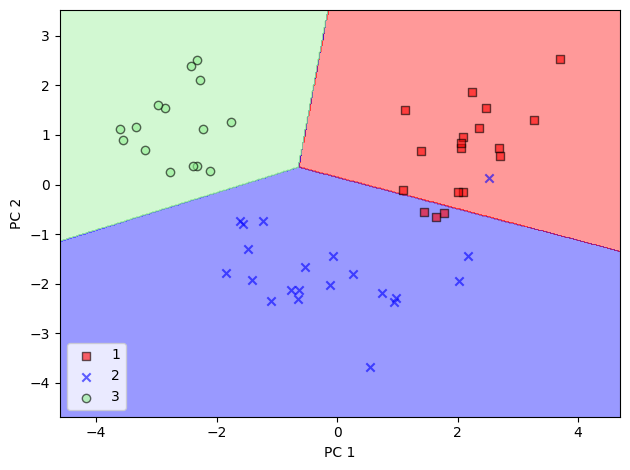

In [45]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()